In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
news20 = pd.read_csv("gdrive/My Drive/data/반려동물_2020.01.01_2020.12.31_1.csv")
news21 = pd.read_csv("gdrive/My Drive/data/반려동물_2021.01.01_2021.12.31_1.csv")
news22 = pd.read_csv("gdrive/My Drive/data/반려동물_2022.01.01_2022.12.25_1.csv")
kipris = pd.read_csv("gdrive/My Drive/data/kipris.csv")
print(news20.shape, news21.shape,news22.shape, kipris.shape)

(4000, 1) (4000, 1) (4000, 1) (7481, 14)


In [4]:
news20.head(5)

,기사 제목
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""


In [5]:
news21.head(5)

,기사 제목
0,이재명 코로나 거점 전담병원 방문…‘반려동물’ 유튜브 출연
1,반려동물 함께 즐기는 스타벅스 더북한강R 점 오픈
2,"잔인한 방법으로 개 도살, 허가 없이 번식도…동물 학대 적발"
3,"반려동물도 코로나 감염…""확진자 재택치료시 분리해야"""
4,올해 최다 이용 반려동물 앱 1위는 펫프렌즈


In [6]:
news22.head(5)

,기사 제목
0,"尹대통령, 은퇴 안내견 입양…관저에 11번째 동물 식구(종합)"
1,"윤 대통령 부부, 은퇴 안내견 '새롬이' 입양… 11번째 반려동물"
2,'동물복지 조례·보호센터 직영 운영'…사람과 동물이 행복한 고양시
3,[영상]부산 1호 반려동물 테마파크...주민들이 반대하는 이유
4,[정치톡톡] 정치권 성탄 메시지 / '민주당의 길' 출범 / 대통령 11번째 반려동...


In [7]:
kipris.head(5)

,대표도면,출원번호,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020210147821,반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...,antioxidant supplements for companion animal a...,등록,A23K 20/10|A23K 50/40|A61K 9/48|A23K 20/158|A2...,(주)한국반려동물영양연구소,문춘오,정설령,2021.11.01,1.024582e+12,2022.10.19,NaN,NaN
1,NaN,1020190100688,스마트폰을 이용한 반려동물 미용샵 예약관리 시스템 및 방법(RESERVATION S...,RESERVATION SYSTEM AND METHOD FOR A PET BEAUTY...,거절,G06Q 50/10|G06Q 10/02|G06Q 30/02|G06Q 50/30|G0...,주식회사 펫미,우정연,백영호,2019.08.18,NaN,NaN,1.020210e+12,2021.02.26
2,NaN,1020200081386,"반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...",SERVER AND USER EQUIPMENT FOR PROVIDING CONTEN...,등록,G06T 7/55|G06T 7/194|G06T 13/40|G06T 11/60|G06...,주식회사 엘지유플러스,특허법인 무한,유한규,2020.07.02,1.024808e+12,2022.12.20,1.020220e+12,2022.01.11
3,NaN,1020210044524,딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...,A method and electronic device for distinguish...,공개,G16H 50/70|G16H 50/20|G16H 30/40|G16H 30/20|G0...,주식회사 알파도,박수영,지영호,2021.04.06,NaN,NaN,1.020220e+12,2022.10.14
4,NaN,1020220060339,스마트 반려동물 배변패드 처리장치(Smart companion animal defe...,Smart companion animal defecation pad disposal...,등록,A01K 1/01|A01K 23/00,충북대학교 산학협력단,김정현,이아연|구승회,2022.05.17,1.024807e+12,2022.12.20,NaN,NaN


# 전처리

In [8]:
# 중복값 제거
news20 = news20.drop_duplicates()
news21 = news21.drop_duplicates()
news22 = news22.drop_duplicates()
kipris = kipris.drop_duplicates()

In [9]:
news20.shape,news21.shape, news22.shape, kipris.shape

((2841, 1), (2824, 1), (2826, 1), (7391, 14))

In [10]:
#결측치 확인
kipris.isnull().sum()

대표도면         7391
출원번호            0
발명의명칭           0
발명의명칭(영문)      12
상태              0
IPC분류           0
출원인             0
대리인           509
발명자             0
출원일자            0
등록번호         4261
등록일자         4261
공개번호         1119
공개일자         1119
dtype: int64

In [11]:
news20.isnull().sum().sum(),news21.isnull().sum().sum(),news22.isnull().sum().sum()

(0, 0, 0)

In [12]:
import re

def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]',' ',text)
    text = re.sub('[\s]+',' ',text)
    text = re.sub("[!\"\$\*\']", ' ', text)
    text = text.lower()
    return text

In [13]:
from tqdm import tqdm
tqdm.pandas()

news20["기사 제목"] = news20["기사 제목"].progress_map(preprocessing)
news21["기사 제목"] = news21["기사 제목"].progress_map(preprocessing)
news22["기사 제목"] = news22["기사 제목"].progress_map(preprocessing)
kipris["발명의명칭"] = kipris["발명의명칭"].progress_map(preprocessing)

100%|██████████| 7391/7391 [00:00<00:00, 78097.31it/s]


In [14]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '하는', '할','하고','그리고', '그', '등', '이런', '및','제','과','더','도',"일",'위한','출시','개최',"년","반려동물","이의 용도","반려동물과","첫","만",
             "for","and","the"]
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [15]:
news20["기사 제목"] = news20["기사 제목"].map(remove_stopwords)
news21["기사 제목"] = news21["기사 제목"].map(remove_stopwords)
news22["기사 제목"] = news22["기사 제목"].map(remove_stopwords)
kipris["발명의명칭"] = kipris["발명의명칭"].map(remove_stopwords)

In [16]:
display(news20.head(2))
display(news21.head(2))
display(news22.head(2))
display(kipris.head(2))

,기사 제목
0,은평구 문화교실 댕댕이 스쿨 운영
1,새해부터 미용사 나무의사도 신중년 고용장려금 받는다


,기사 제목
0,이재명 코로나 거점 전담병원 방문 유튜브 출연
1,함께 즐기는 스타벅스 더북한강r 점 오픈


,기사 제목
0,대통령 은퇴 안내견 입양 관저에 번째 동물 식구 종합
1,윤 대통령 부부 은퇴 안내견 새롬이 입양 번째


,대표도면,출원번호,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020210147821,반려동물용 항산화 보조제 제조 방법 antioxidant supplements co...,antioxidant supplements for companion animal a...,등록,A23K 20/10|A23K 50/40|A61K 9/48|A23K 20/158|A2...,(주)한국반려동물영양연구소,문춘오,정설령,2021.11.01,1.024582e+12,2022.10.19,NaN,NaN
1,NaN,1020190100688,스마트폰을 이용한 미용샵 예약관리 시스템 방법 reservation system m...,RESERVATION SYSTEM AND METHOD FOR A PET BEAUTY...,거절,G06Q 50/10|G06Q 10/02|G06Q 30/02|G06Q 50/30|G0...,주식회사 펫미,우정연,백영호,2019.08.18,NaN,NaN,1.020210e+12,2021.02.26


In [17]:
!apt-get install fonts-nanum -qq  > /dev/null
!fc-cache -fv

import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [18]:
from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        # r(raw) \n 이 있을 때 경로에서 줄바꿈을 하는 문제 등이 발생하기 때문에 그 텍스트 그대로 읽어오게 합니다.
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        background_color="white",
        stopwords=["반려동물","위한","개최","출시","일","반려동물과","이의 용도"],
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

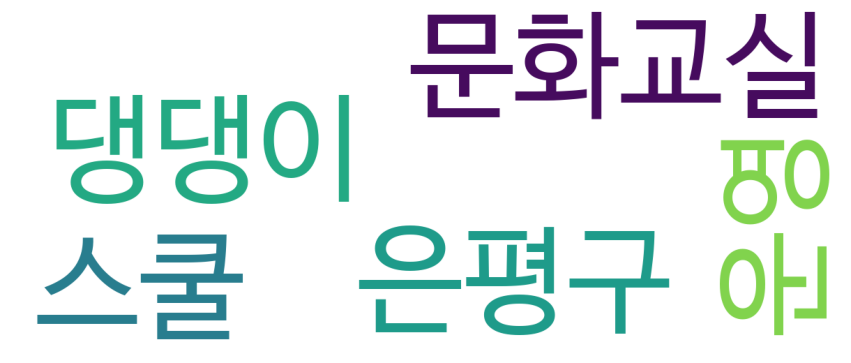

In [19]:
display_word_cloud(news20.loc[0, "기사 제목"])

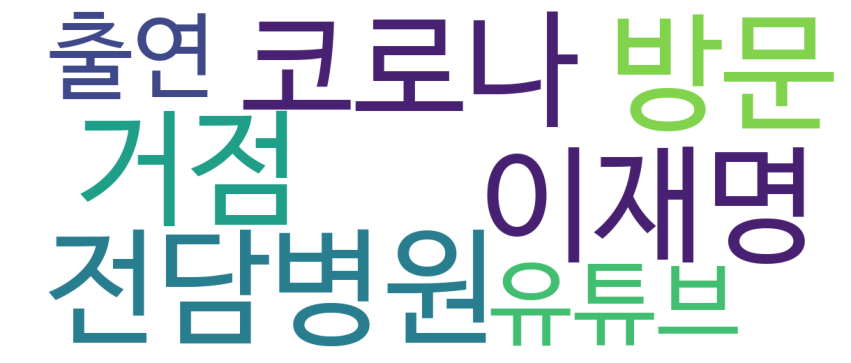

In [20]:
display_word_cloud(news21.loc[0, "기사 제목"])

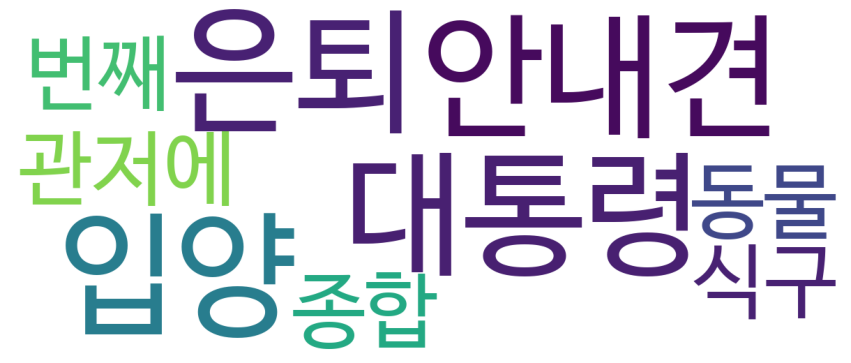

In [21]:
display_word_cloud(news22.loc[0, "기사 제목"])

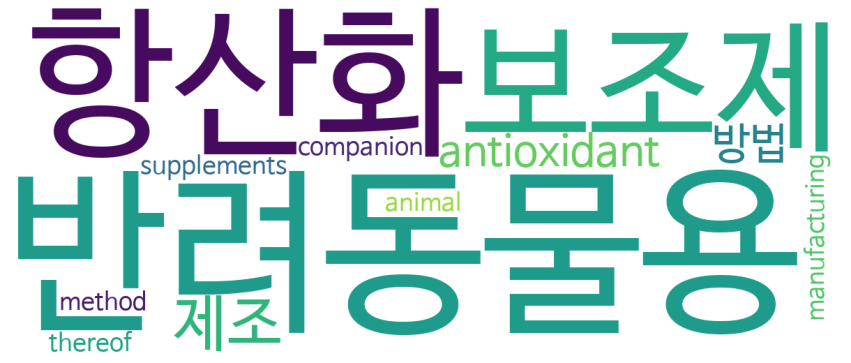

In [22]:
display_word_cloud(kipris.loc[0, "발명의명칭"])

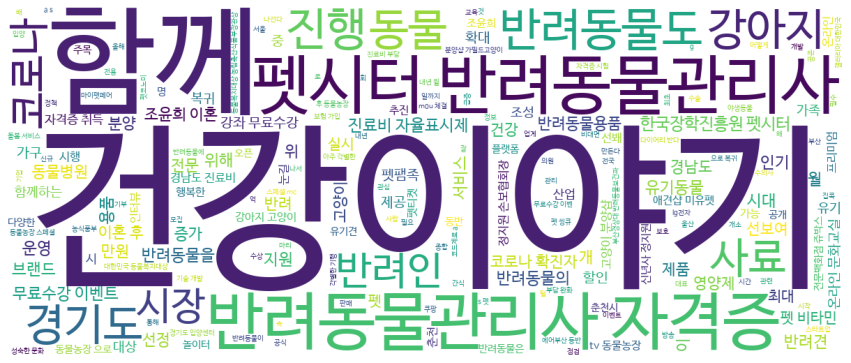

In [23]:
display_word_cloud(" ".join(news20["기사 제목"]))

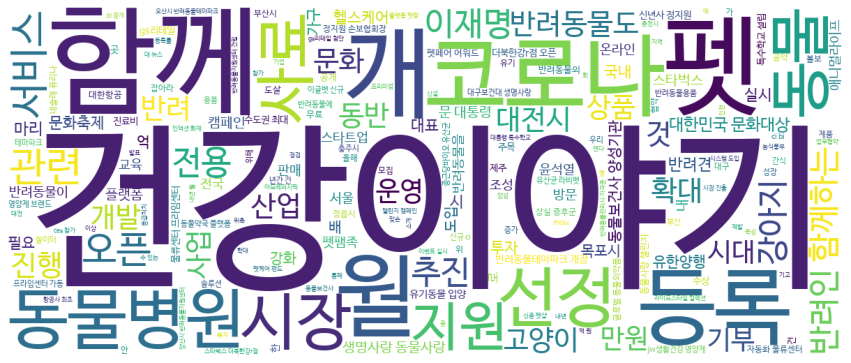

In [24]:
display_word_cloud(" ".join(news21["기사 제목"]))

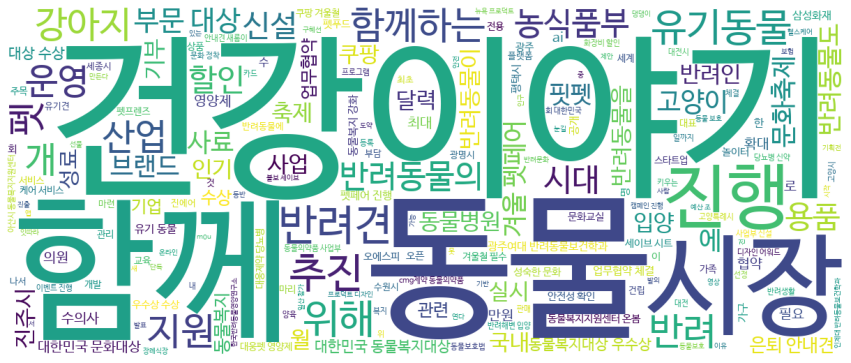

In [25]:
display_word_cloud(" ".join(news22["기사 제목"]))

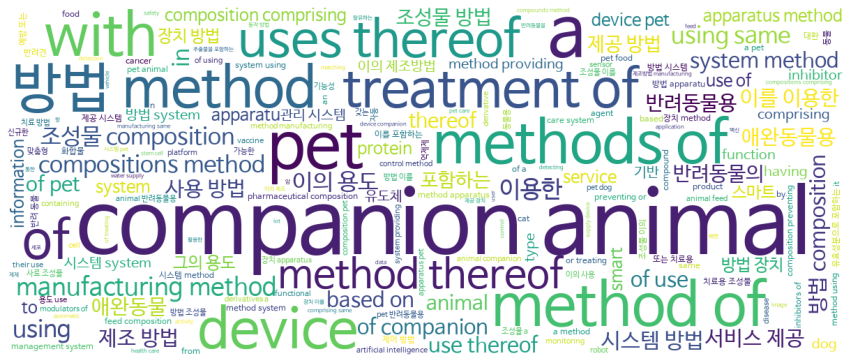

In [26]:
display_word_cloud(" ".join(kipris["발명의명칭"]))

In [27]:
# from tensorflow.keras.preprocessing.text import Tokenizer

# # vocab_size = 400
# tokenizer = Tokenizer()
# tokenizer

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 1000
oov_tok = "<oov>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# tokenizer = Tokenizer(oov_token = oov_tok)
tokenizer

In [29]:
# news20_token = tokenizer.fit_on_texts(news20["기사 제목"])
# news21_token = tokenizer.fit_on_texts(news21["기사 제목"])
news22_token = tokenizer.fit_on_texts(news22["기사 제목"])

In [30]:
word_to_index = tokenizer.word_index
word_to_index

{'<oov>': 1,
 '동물': 2,
 '수상': 3,
 '함께': 4,
 '진행': 5,
 '유기동물': 6,
 '시장': 7,
 '펫': 8,
 '건강이야기': 9,
 '서비스': 10,
 '대상': 11,
 '지원': 12,
 '신설': 13,
 '대한민국': 14,
 '동물복지': 15,
 '할인': 16,
 '회': 17,
 '영양제': 18,
 '농식품부': 19,
 '입양': 20,
 '위해': 21,
 '반려동물보건학과': 22,
 '강화': 23,
 '반려견': 24,
 '브랜드': 25,
 '함께하는': 26,
 '기부': 27,
 '체결': 28,
 '운영': 29,
 '조성': 30,
 '추진': 31,
 '업무협약': 32,
 '문화': 33,
 '의원': 34,
 '시대': 35,
 '문화축제': 36,
 '헬스케어': 37,
 '보호': 38,
 '개': 39,
 '부문': 40,
 '사료': 41,
 '에': 42,
 '문화대상': 43,
 '쿠팡': 44,
 '문화교실': 45,
 '캠페인': 46,
 '판매': 47,
 '반려': 48,
 '진료비': 49,
 '강아지': 50,
 '산업': 51,
 '반려동물용': 52,
 '반려동물의': 53,
 '최대': 54,
 '가구': 55,
 '겨울': 56,
 '최초': 57,
 '교육': 58,
 '고양이': 59,
 '펫페어': 60,
 '만원': 61,
 '달력': 62,
 '핏펫': 63,
 '유기': 64,
 '용품': 65,
 '로': 66,
 '반려동물용품': 67,
 '플랫폼': 68,
 '반려동물도': 69,
 '이벤트': 70,
 '대표': 71,
 '성숙한': 72,
 '억': 73,
 '케어': 74,
 '대통령': 75,
 '동물병원': 76,
 '대전시': 77,
 '등록': 78,
 '국내': 79,
 '반려인': 80,
 '협약': 81,
 '의료비': 82,
 '가족': 83,
 '건강': 84,
 '선정': 85,
 '수의사': 86,
 '동물보

In [31]:
wc = tokenizer.word_counts
pd.DataFrame(wc.items()).set_index(0).sort_values(by =1,ascending=False).T

,동물,수상,진행,함께,유기동물,시장,펫,건강이야기,서비스,대상,...,찾을,순구의,고양이가,개체수,이유는,기탁한,충북대동물병원에,보호자가,아이트,배변실수
1,89,82,77,77,63,61,61,58,55,53,...,1,1,1,1,1,1,1,1,1,1


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer()
tfidfvect

TfidfVectorizer()

In [33]:
# tfidfvect.fit_transform(news20)
# tfidfvect.fit_transform(news21)
tfidfvect.fit_transform(news22)

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [34]:
vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(news20["기사 제목"])
# X_1 = vectorizer.fit_transform(news21["기사 제목"])
X_2 = vectorizer.fit_transform(news22["기사 제목"])
vectorizer.get_feature_names_out()

array(['ai', 'ai가', 'ai로', ..., '힘써', '힘쓸', '힘준다'], dtype=object)

In [35]:
print(X_2.shape)

(2826, 6653)


In [36]:
from collections import Counter
def top_10_words(wc):
    word_counts = Counter(wc)
    return word_counts.most_common(100)

In [37]:
top_10_words(wc)

[('동물', 89),
 ('수상', 82),
 ('함께', 77),
 ('진행', 77),
 ('유기동물', 63),
 ('시장', 61),
 ('펫', 61),
 ('건강이야기', 58),
 ('서비스', 55),
 ('대상', 53),
 ('지원', 48),
 ('신설', 47),
 ('대한민국', 44),
 ('동물복지', 43),
 ('할인', 43),
 ('회', 42),
 ('영양제', 42),
 ('농식품부', 42),
 ('입양', 41),
 ('위해', 41),
 ('반려동물보건학과', 41),
 ('강화', 39),
 ('반려견', 38),
 ('브랜드', 37),
 ('함께하는', 37),
 ('기부', 36),
 ('체결', 36),
 ('운영', 35),
 ('조성', 35),
 ('추진', 35),
 ('업무협약', 35),
 ('문화', 34),
 ('의원', 34),
 ('시대', 34),
 ('문화축제', 34),
 ('헬스케어', 33),
 ('보호', 33),
 ('개', 32),
 ('부문', 32),
 ('사료', 31),
 ('에', 31),
 ('문화대상', 31),
 ('쿠팡', 31),
 ('문화교실', 31),
 ('캠페인', 30),
 ('판매', 30),
 ('반려', 30),
 ('진료비', 30),
 ('강아지', 29),
 ('산업', 29),
 ('반려동물용', 29),
 ('반려동물의', 28),
 ('최대', 28),
 ('가구', 28),
 ('겨울', 28),
 ('최초', 27),
 ('교육', 27),
 ('고양이', 27),
 ('펫페어', 27),
 ('만원', 26),
 ('달력', 26),
 ('핏펫', 26),
 ('유기', 26),
 ('용품', 26),
 ('로', 26),
 ('반려동물용품', 25),
 ('플랫폼', 25),
 ('반려동물도', 25),
 ('이벤트', 25),
 ('대표', 25),
 ('성숙한', 25),
 ('억', 24),
 ('케어', 24),
 ('